# Time Series Analysis - ARIMA - Air Passengers Data

In [3]:
# Importing required packages

import numpy as np                    # For mathematical calculations 
import pandas as pd                   # For data manipulation, analysis and cleaning
import matplotlib.pylab as plt        # For plotting graphs 
%matplotlib inline                    # All plots will be there in jupyter notebook rather than opening it in a separate tab
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6     # Defined plot fig size
import warnings                       # To disable warnings
warnings.filterwarnings("ignore")     # To ignore filter warnings

UsageError: unrecognized arguments: # All plots will be there in jupyter notebook rather than opening it in a separate tab


In [4]:
# Reading the Air Passengers data from local working directory

AP = pd.read_csv('AirPassengers.csv')  

In [5]:
# Check the given data

AP.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In the above dataset 'AP' we will parse Month column into datetime format and also set it as index:

In [6]:
AP['Month'] = pd.to_datetime(AP['Month'], infer_datetime_format=True)
indexAP = AP.set_index(['Month'])

In [7]:
# Check again for datetime format & index

indexAP.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
#Check shape or number of observations

indexAP.shape

(144, 1)

C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


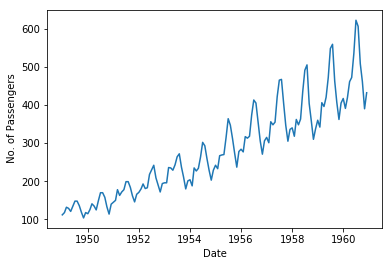

In [9]:
# Plotting graph to see visuals of # of Passengers against time

plt.xlabel("Date")
plt.ylabel(" No. of Passengers")
plt.plot(indexAP)

As per the above plot it is clear that data is Non-Satationary as it looks obvious that mean is not constat w.r.to time.


We have to popular tests to check wheather a given dataset is stationary or not:
1. Rolling Statistics
2. ADCF (Augmented Dickey-Fuller Test)

In [10]:
# Check for Rolling Statistics

rolmean = indexAP.rolling(window = 12).mean()
rolstd = indexAP.rolling(window = 12).std()

print(rolmean,rolstd)

# As the given data is in months therefore window=12 indicates 12 months mean/standard deviation. 
# Therefore for first 11 months it will be NaN

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

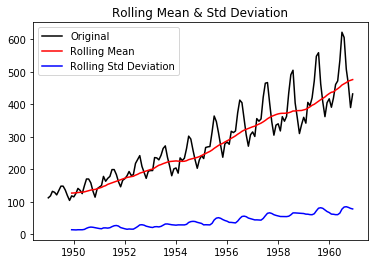

In [11]:
# Now visualize the rolling statistics along with original indexed data 'indexAP'

origin = plt.plot(indexAP, color = 'black', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'blue', label = 'Rolling Std Deviation')

plt.legend(loc = 'best')
plt.title("Rolling Mean & Std Deviation")

plt.show()


Rolling statistics is suited for POC as it is a visual technique. Not used for production. 

Here it is quite clear than mean and std deviation is not constant therefore given data series is Non-Stationary.

In [12]:
# Checking the another method ADCF (Augmented Dickey-Fuller Test)

from statsmodels.tsa.stattools import adfuller


adcftest = adfuller(indexAP['#Passengers'], autolag = 'AIC')

# The Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit, and 2) the simplicity/parsimony, of the model into a single statistic.
# When comparing two models (Actual & Predicted Values), the one with the lower AIC is generally “better”.

In [13]:
adcftest

(0.8153688792060456,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

#### Function to print ADCF Results

In [14]:
def ADCF_Results(adcftestresult):
    
    print('Results of Dickey-Fuller Test:')
    
    adcftest_output = pd.Series(adcftestresult[0:4],index = ['Test Statistic', 'p-Value', '#Lags Used', '# Observation Used'])
    
    for key,value in adcftest[4].items():
        adcftest_output['Critical Value (%s)'%key] = value
    
    print(adcftest_output)

In [15]:
ADCF_Results(adcftest)

Results of Dickey-Fuller Test:
Test Statistic            0.815369
p-Value                   0.991880
#Lags Used               13.000000
# Observation Used      130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


#### Interpretation for ADCF

Test Statistic > Critical Value   
Which Implies ---> Can Not Reject Null Hypothesis ---> Non-Stationary

Also,

p-Value > 0.05  
Which Implies ---> Non-Stationary

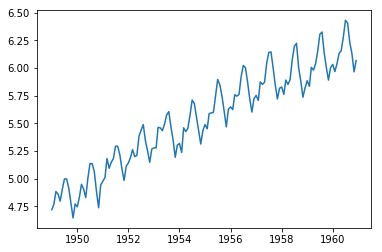

In [16]:
# Estimating Trend using Log Function

indexAP_log = np.log(indexAP)
plt.plot(indexAP_log)

# It will change the scale (that is y-axis values) but the trend reamin same. Therefore data series is Non-Stationary
# In order to make data stationary, we can take square root or cube root depending on the given time series data

In [17]:
# Check for Rolling Statistics with log scale data 'indexAP_log'

rolmean1 = indexAP_log.rolling(window = 12).mean()
rolstd1 = indexAP_log.rolling(window = 12).std()

print(rolmean1,rolstd1)

# As the given data is in months therefore window=12 indicates 12 months mean/standard deviation. 
# Therefore for first 11 months it will be NaN

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01     4.836178
1950-01-01     4.838381
1950-02-01     4.843848
1950-03-01     4.849344
1950-04-01     4.853133
1950-05-01     4.855843
1950-06-01     4.864066
1950-07-01     4.875614
1950-08-01     4.887163
1950-09-01     4.899658
1950-10-01     4.908927
1950-11-01     4.916578
1950-12-01     4.930824
1951-01-01     4.950141
1951-02-01     4.964670
1951-03-01     4.984089
1951-04-01     4.999795
1951-05-01     5.026394
1951-06-01     5.041214
...                 ...
1958-07-01     5.919627
1958-08-01     5.926146
1958-09-01     5.926146
1958-10-01     5.928980
1958-11-01     5.930335
1958-12-01     5.930582
1959-01-01     5.935346
1959-02-01     5.941409
1959-03-01     5

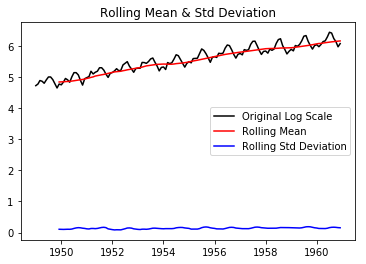

In [18]:
# Now visualize the rolling statistics along with log scale indexed data 'indexAP_log'

origin = plt.plot(indexAP_log, color = 'black', label = 'Original Log Scale')
mean = plt.plot(rolmean1, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd1, color = 'blue', label = 'Rolling Std Deviation')

plt.legend(loc = 'best')
plt.title("Rolling Mean & Std Deviation")

plt.show()


As we see in the above graph that mean is not constant hence data series is Non-Stationary 




Now we will subtract moving average (rolmean1) from log scale data. As we know that first 11 values for moving average 
is 'NaN' therefore we will drop na values after subtraction.

In [19]:
indexAP_log_mAvg = indexAP_log - rolmean1
indexAP_log_mAvg.head(5)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [20]:
indexAP_log_mAvg.dropna(inplace = True)
indexAP_log_mAvg.head(5)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


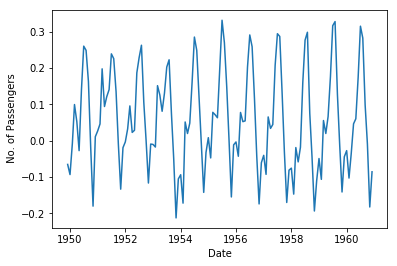

In [21]:
# Plotting graph to see visuals of # of Passengers (transformed via log and then subtracting moving avg) against time

plt.xlabel("Date")
plt.ylabel(" No. of Passengers")
plt.plot(indexAP_log_mAvg)

### Function to Check Time Series is STATIONARY or NOT

In [22]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timesseriesdata):
    rolmean = timesseriesdata.rolling(window = 12).mean()
    rolstd = timesseriesdata.rolling(window = 12).std()

    # Now visualize the rolling statistics along with original indexed data 'indexAP'

    origin = plt.plot(timesseriesdata, color = 'black', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'blue', label = 'Rolling Std Deviation')

    plt.legend(loc = 'best')
    plt.title("Rolling Mean & Std Deviation")

    plt.show(block = False)
    
    # Checking the another method ADCF (Augmented Dickey-Fuller Test)
    adcftest = adfuller(timesseriesdata['#Passengers'], autolag = 'AIC')

    # The Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
    # It basically quantifies 1) the goodness of fit, and 2) the simplicity/parsimony, of the model into a single statistic.
    # When comparing two models (Actual & Predicted Values), the one with the lower AIC is generally “better”.
    
    ADCF_Results(adcftest) # calling function ADCF_Results. It is defined in the above lines of code

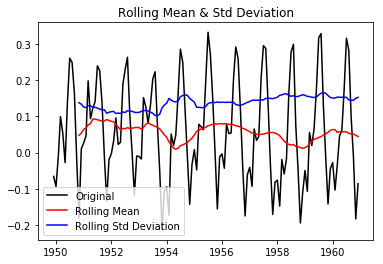

Results of Dickey-Fuller Test:
Test Statistic           -3.162908
p-Value                   0.022235
#Lags Used               13.000000
# Observation Used      119.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [23]:
# Now calling check_stationarity function

check_stationarity(indexAP_log_mAvg)

Although graph looks better than previous, but the above stationarity results shows that data series is still Non-Stationary

Also,
Test Statistic > Critical Value  (Now slightly higher) 
Which Implies ---> Can Not Reject Null Hypothesis ---> Non-Stationary

But we have,

p-Value < 0.05  (Which says somewhat Stationary)


#### Another method using Exponential Decay(Moving) Weighted Average instead of  Moving Average

Previously we caluclated rolling mean and then subtracted it from log scale data series, this time we will do same with weighted avearge

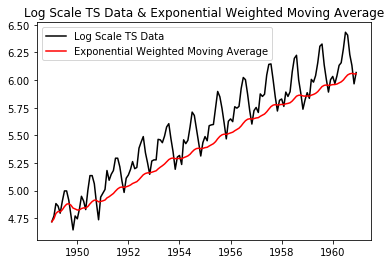

In [24]:
# Exponential weighted moving average

ExWtMovingAvg = indexAP_log.ewm(halflife=12, min_periods=0, adjust=True).mean()

# Plot log scale data series along with Exponential Weighted Moving Average

LSTD = plt.plot(indexAP_log, color='black', label='Log Scale TS Data')
EWMA = plt.plot(ExWtMovingAvg, color='red', label='Exponential Weighted Moving Average')

plt.legend(loc = 'best')
plt.title("Log Scale TS Data & Exponential Weighted Moving Average")

plt.show()

Now we will subtract Exponential Weighted Moving Average from log scale time series data and again check for stationarity:

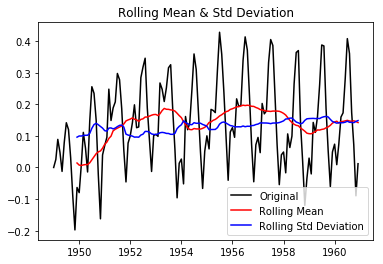

Results of Dickey-Fuller Test:
Test Statistic           -3.601262
p-Value                   0.005737
#Lags Used               13.000000
# Observation Used      130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [25]:
indexAP_log_ExWtMovAvg = indexAP_log - ExWtMovingAvg

check_stationarity(indexAP_log_ExWtMovAvg)

As we see that graph looks better now, Std Deviation is quite flat and mean variation is less than earlier

Also,
Test Statistic < Critical Value
Which Implies ---> Reject Null Hypothesis ---> Stationary

p-Value < 0.05  (Stationary)

#### As we see that our data is now STATIONARY therefore we can shift the values into time series so that we can use it to forecast

Here we will take lag of 1 therefore our values will shift by 1

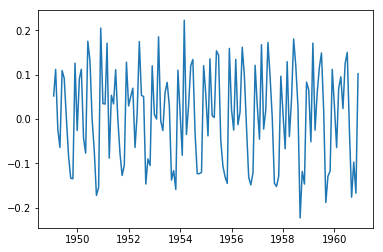

In [26]:
# Shift the values with lag 1
indexAP_log_DiffShifting = indexAP_log - indexAP_log.shift()

# Plot to check shifted time series data
plt.plot(indexAP_log_DiffShifting)

Now we will drop na values from the above shifted time series data and check for stationarity again:

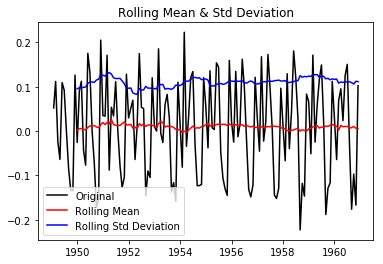

Results of Dickey-Fuller Test:
Test Statistic           -2.717131
p-Value                   0.071121
#Lags Used               14.000000
# Observation Used      128.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [27]:
indexAP_log_DiffShifting.dropna(inplace = True)

check_stationarity(indexAP_log_DiffShifting)

### Now we have STATIONARY TIME SERIES data

Visually we see that mean and std deviation looks flat and,
ADCF test shows that Test Statistic is less than Critical value also p-Value is less than 0.05

Therefore all indicators indicate that Time Series is STATIONARY

## COMPONENTS OF TIME SERIES:

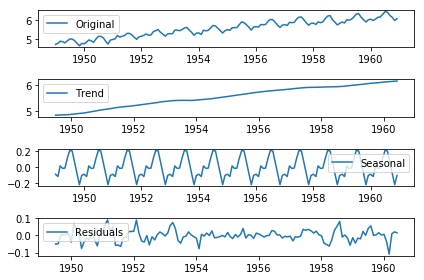

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexAP_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexAP_log, label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')

plt.tight_layout()

From the above subplots,

We have Original Data, Upward Trend and Seasonality in high scale.

Residual are nothing but irregularity. It has no shape, size and we can not say what will be going to happen. Now we will check that the NOISE(Residual) is STATIONARY or NOT:

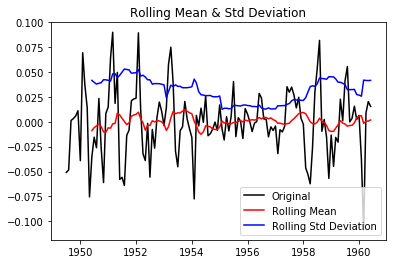

Results of Dickey-Fuller Test:
Test Statistic         -6.332387e+00
p-Value                 2.885059e-08
#Lags Used              9.000000e+00
# Observation Used      1.220000e+02
Critical Value (1%)    -3.481682e+00
Critical Value (5%)    -2.884042e+00
Critical Value (10%)   -2.578770e+00
dtype: float64


In [29]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)

check_stationarity(decomposedLogData)

You can see above that Residual(NOISE) is not stationary that is why we do moving average to soothen it out.

We know the value of 'd' (Order of Differentiation) now we will find out 'p' & 'q'. We need to plot PACF(Partial Autocorrelation) graph for 'p' and ACF(Autocorrelation) graph for 'q'.

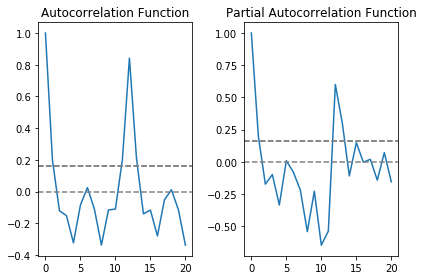

In [30]:
# ACF & PACF graphs:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexAP_log_DiffShifting, nlags=20)
lag_pacf = pacf(indexAP_log_DiffShifting, nlags=20, method='ols')

# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexAP_log_DiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexAP_log_DiffShifting)),linestyle='--', color='gray')
plt.title("Autocorrelation Function")

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexAP_log_DiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexAP_log_DiffShifting)),linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()


For getting 'p' and 'q' values look at plots where the graph drops to zero value for the first time and take corresponding value as 'p' and 'q'.From the above graph we have p=2 & q=2.

C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


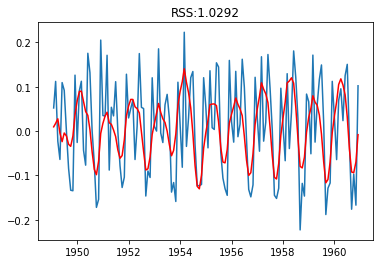

In [31]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model
model = ARIMA(indexAP_log, order=(2,1,2))
results_AR = model.fit(disp=1)
plt.plot(indexAP_log_DiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f'%sum((results_AR.fittedvalues - indexAP_log_DiffShifting["#Passengers"])**2))
print("Plotting AR Model")


In the above graph, we have RSS(Residual Sum of Square) 1.0292 which is good. Lower the RSS, best it is.

One can change (p,d,q) values and observe RSS(It will increase)

C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


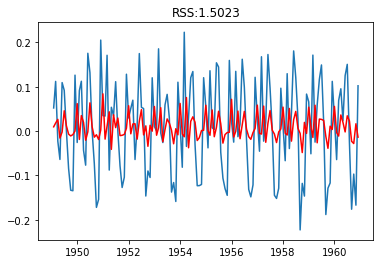

In [32]:
# MA Model
model = ARIMA(indexAP_log, order=(2,1,0))
results_MA = model.fit(disp=1)
plt.plot(indexAP_log_DiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS:%.4f'%sum((results_MA.fittedvalues - indexAP_log_DiffShifting["#Passengers"])**2))
print("Plotting AR Model")

In the above AR model, we had q=0 therefore order was (2,1,0). It gives RSS = 1.5023

C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


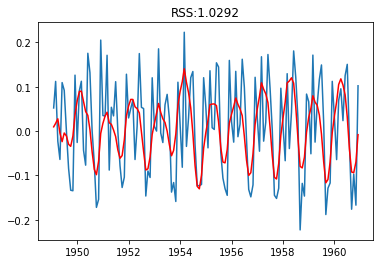

In [33]:
# Combined (AR+MA) Model
model = ARIMA(indexAP_log, order=(2,1,2))
results_ARIMA = model.fit(disp=1)
plt.plot(indexAP_log_DiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS:%.4f'%sum((results_ARIMA.fittedvalues - indexAP_log_DiffShifting["#Passengers"])**2))
print("Plotting ARIMA Model")

In the above combined plot, we get better RSS (1.02), which is quite good.

Let's do some fitting on the time series data that we have. Now we are converting the fitted values from ARIMA model results into a series. In the below table we have months and predictions:

In [34]:
# Convert ARIMA result's fitted value into series:

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


Now we will find cummulative values, post this we will find prediction for fitted values.

In [36]:
# Convert to cummulative sum:

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [41]:
# Print predictions done for the fitted values:

predictions_ARIMA_log = pd.Series(indexAP_log['#Passengers'].ix[0], index = indexAP_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head(5)

C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64